In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler


In [3]:

# Load the dataset
credit_card_data = pd.read_csv('/content/creditcard.csv')


In [4]:

# First 5 rows of the dataset
print(credit_card_data.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:

# Dataset information
credit_card_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:

# Checking for missing values
print(credit_card_data.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:

# Distribution of legit transactions & fraudulent transactions
print(credit_card_data['Class'].value_counts())


Class
0    284315
1       492
Name: count, dtype: int64


In [8]:

# Separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]


In [9]:

print(f"Legit transactions shape: {legit.shape}")
print(f"Fraud transactions shape: {fraud.shape}")


Legit transactions shape: (284315, 31)
Fraud transactions shape: (492, 31)


In [10]:

# Statistical summary for legit transactions
print("Legit transactions statistical summary:")
print(legit.Amount.describe())


Legit transactions statistical summary:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [11]:

# Statistical summary for fraud transactions
print("Fraud transactions statistical summary:")
print(fraud.Amount.describe())


Fraud transactions statistical summary:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


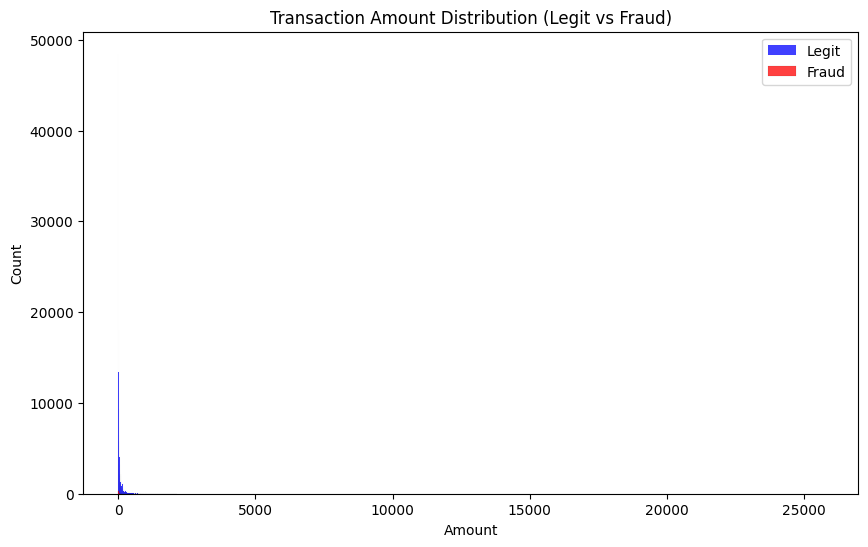

In [12]:

# Visualizing the distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(legit['Amount'], color='blue', label='Legit')
sns.histplot(fraud['Amount'], color='red', label='Fraud')
plt.legend()
plt.title('Transaction Amount Distribution (Legit vs Fraud)')
plt.show()


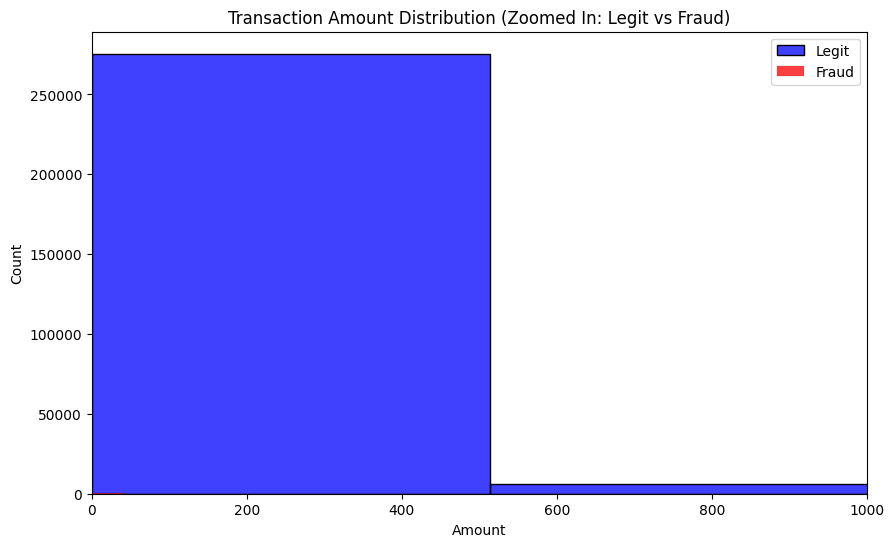

In [42]:
# Visualizing the distribution of transaction amounts with zoomed-in x-axis
plt.figure(figsize=(10, 6))

# Plotting legit transactions
sns.histplot(legit['Amount'], color='blue', label='Legit', kde=False, bins=50)

# Plotting fraudulent transactions
sns.histplot(fraud['Amount'], color='red', label='Fraud', kde=False, bins=50)

# Setting limits to zoom into the smaller transaction amounts (0 to 1000)
plt.xlim(0, 1000)

# Adding a legend, title, and labels
plt.legend()
plt.title('Transaction Amount Distribution (Zoomed In: Legit vs Fraud)')
plt.xlabel('Amount')
plt.ylabel('Count')

# Displaying the plot
plt.show()


In [34]:
# Resampling the dataset to balance classes using RandomUnderSampler
X = credit_card_data.drop(columns='Class', axis=1)
Y = credit_card_data['Class']

rus = RandomUnderSampler(random_state=42)
X_resampled, Y_resampled = rus.fit_resample(X, Y)

print(f"Resampled dataset shape: {X_resampled.shape}, {Y_resampled.shape}")
print(Y_resampled.value_counts())


Resampled dataset shape: (984, 30), (984,)
Class
0    492
1    492
Name: count, dtype: int64


In [35]:

# Train-test split (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, stratify=Y_resampled, random_state=42)


In [36]:

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [37]:
# Logistic Regression Model
model = LogisticRegression()

In [38]:
# Training the model
model.fit(X_train, Y_train)


LogisticRegression()

In [39]:
# Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)


Accuracy on Training data :  0.9466327827191868


In [40]:
# Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)


Accuracy score on Test Data :  0.9644670050761421


In [41]:
# Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(Y_test, X_test_prediction))

print("Classification Report:")
print(classification_report(Y_test, X_test_prediction))

Confusion Matrix:
[[97  2]
 [ 5 93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        99
           1       0.98      0.95      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197

